**Testing Multiple Variables and Testing Multiple Datasets**

### ANOVA, Kruskal-Wallis Test, chi-squared test

### Test Multiple normally distributed variables: Analysis of variance(ANOVA) in python

Analysis of Variance (ANOVA) is a statistical test used to analyze ***the differences among group means in a sample.*** It's particularly useful when you have more than two groups and want to determine whether there **are significant differences between these groups**. ***ANOVA works by comparing the variance within each group to the variance between the groups.***

Generalizes T-test for multiple samples. Variables should have similar mean and variance.

In [1]:
import pandas

In [2]:
import statsmodels

In [3]:
import statsmodels.api

In [4]:
import statsmodels.formula.api

### Creating DataFrame

In [5]:
data = pandas.DataFrame({"dataset1":(6,8,7,9,8,7),
             "dataset2":(8,9,7,9,10,8),
             "dataset3":(6,5,9,8,6,7)})

In [6]:
data

,dataset1,dataset2,dataset3
0,6,8,6
1,8,9,5
2,7,7,9
3,9,9,8
4,8,10,6
5,7,8,7


Data Formulation for ANOVA:
Formulating data for grouping data from similar group within a column

###The code you provided imports various modules and functions from the `statsmodels` library in Python. `statsmodels` is a powerful library used for statistical modeling and analysis in Python. Let's break down each line of the code:

1. `import statsmodels`: This line imports the main `statsmodels` module. By doing this, you make all the functionalities and submodules of `statsmodels` available for use in your code.

2. `import statsmodels.api`: This line imports the `api` submodule from `statsmodels`. The `api` submodule provides access to various statistical models, data manipulation tools, and other functions. It is often used for more advanced statistical analysis.

3. `import statsmodels.formula.api`: This line imports the `api` submodule specifically for working with formulas. In statistics, formulas are commonly used to define models and relationships between variables. The `formula.api` submodule allows you to create models using formulas, making it easier to specify regression models and other statistical relationships.

###After importing these modules, you can use the functions and classes provided by `statsmodels` to perform various statistical analyses, build regression models, conduct hypothesis tests, and more. The specific functionality and usage of these modules would depend on the context of your code and what you want to accomplish with statistical modeling and analysis.

In [7]:
modified_data = pandas.melt(data,value_vars = ["dataset1","dataset2","dataset3"]) ### defining the labels for value data

In [8]:
modified_data.columns = ["dataset","value"] ###asssigning column names

In [9]:
modified_data ### dataset column has categorical values

,dataset,value
0,dataset1,6
1,dataset1,8
2,dataset1,7
3,dataset1,9
4,dataset1,8
5,dataset1,7
6,dataset2,8
7,dataset2,9
8,dataset2,7
9,dataset2,9


###Model

In [10]:
model = statsmodels.formula.api.ols("value ~ C(dataset) ",data=modified_data).fit() ###defining  a model where value belongs to Anova

In [11]:
model

#### Anova Test

In [12]:
### ANova
anova = statsmodels.api.stats.anova_lm(model,typ=1)

In [13]:
anova

,df,sum_sq,mean_sq,F,PR(>F)
C(dataset),2.0,8.444444,4.222222,2.900763,0.086093
Residual,15.0,21.833333,1.455556,NaN,NaN


Anova is 0.086. PR

The one-way analysis of variance (ANOVA) test is a statistical method used to asses**s whether there are any significant differences in the means of two or more independent (unrelated) groups or treatments**. In other words, it helps determine whether there is a statistically significant variation between the group means, considering the variability within each group.

Here are the key concepts and components of a one-way ANOVA test:

1. **Groups or Treatments**: The data is divided into two or more groups or treatments. Each group represents a different category or level of the independent variable you are studying. For example, in a medical study, you might have different treatments (e.g., three different drug dosages).

2. **Null Hypothesis (H0)**: The null hypothesis in a one-way ANOVA test states that there is no significant difference between the group means. In other words, all group means are equal.

3. **Alternative Hypothesis (Ha)**: The alternative hypothesis contradicts the null hypothesis and suggests that at least one group mean is different from the others.

4. **F-Statistic**: The ANOVA test calculates an F-statistic, which is a ratio of the variation between the group means to the variation within each group. If the F-statistic is sufficiently large, it indicates that there is a significant difference between at least one pair of group means.

5. **P-Value**: The F-statistic is used to calculate a p-value. The p-value represents the probability of observing the differences in group means by random chance alone. A small p-value (typically less than a chosen significance level, often 0.05) indicates that you can reject the null hypothesis and conclude that there are significant differences between groups.

6. **Post-Hoc Tests**: If the ANOVA test indicates that there are significant differences between groups, post-hoc tests (e.g., Tukey's HSD or Bonferroni correction) can be performed to determine which specific group means are different from each other.

7. **Assumptions**: ANOVA assumes that the data within each group is normally distributed, has equal variances (homoscedasticity), and that the observations are independent.

In summary, a one-way ANOVA is used when you have multiple groups and want to determine if there are statistically significant differences in the means of those groups. It helps you make conclusions about the effect of a categorical independent variable on a continuous dependent variable. If the p-value is low, you reject the null hypothesis and conclude that there are differences between at least some of the groups. If the p-value is high, you fail to reject the null hypothesis, suggesting that the groups are not significantly different from each other.

### **Test multiple variables (>2)which are not normally distributed. ** (Kruskal Walis Test)
Generalizes Mann Whitney U test

No assumption of normality

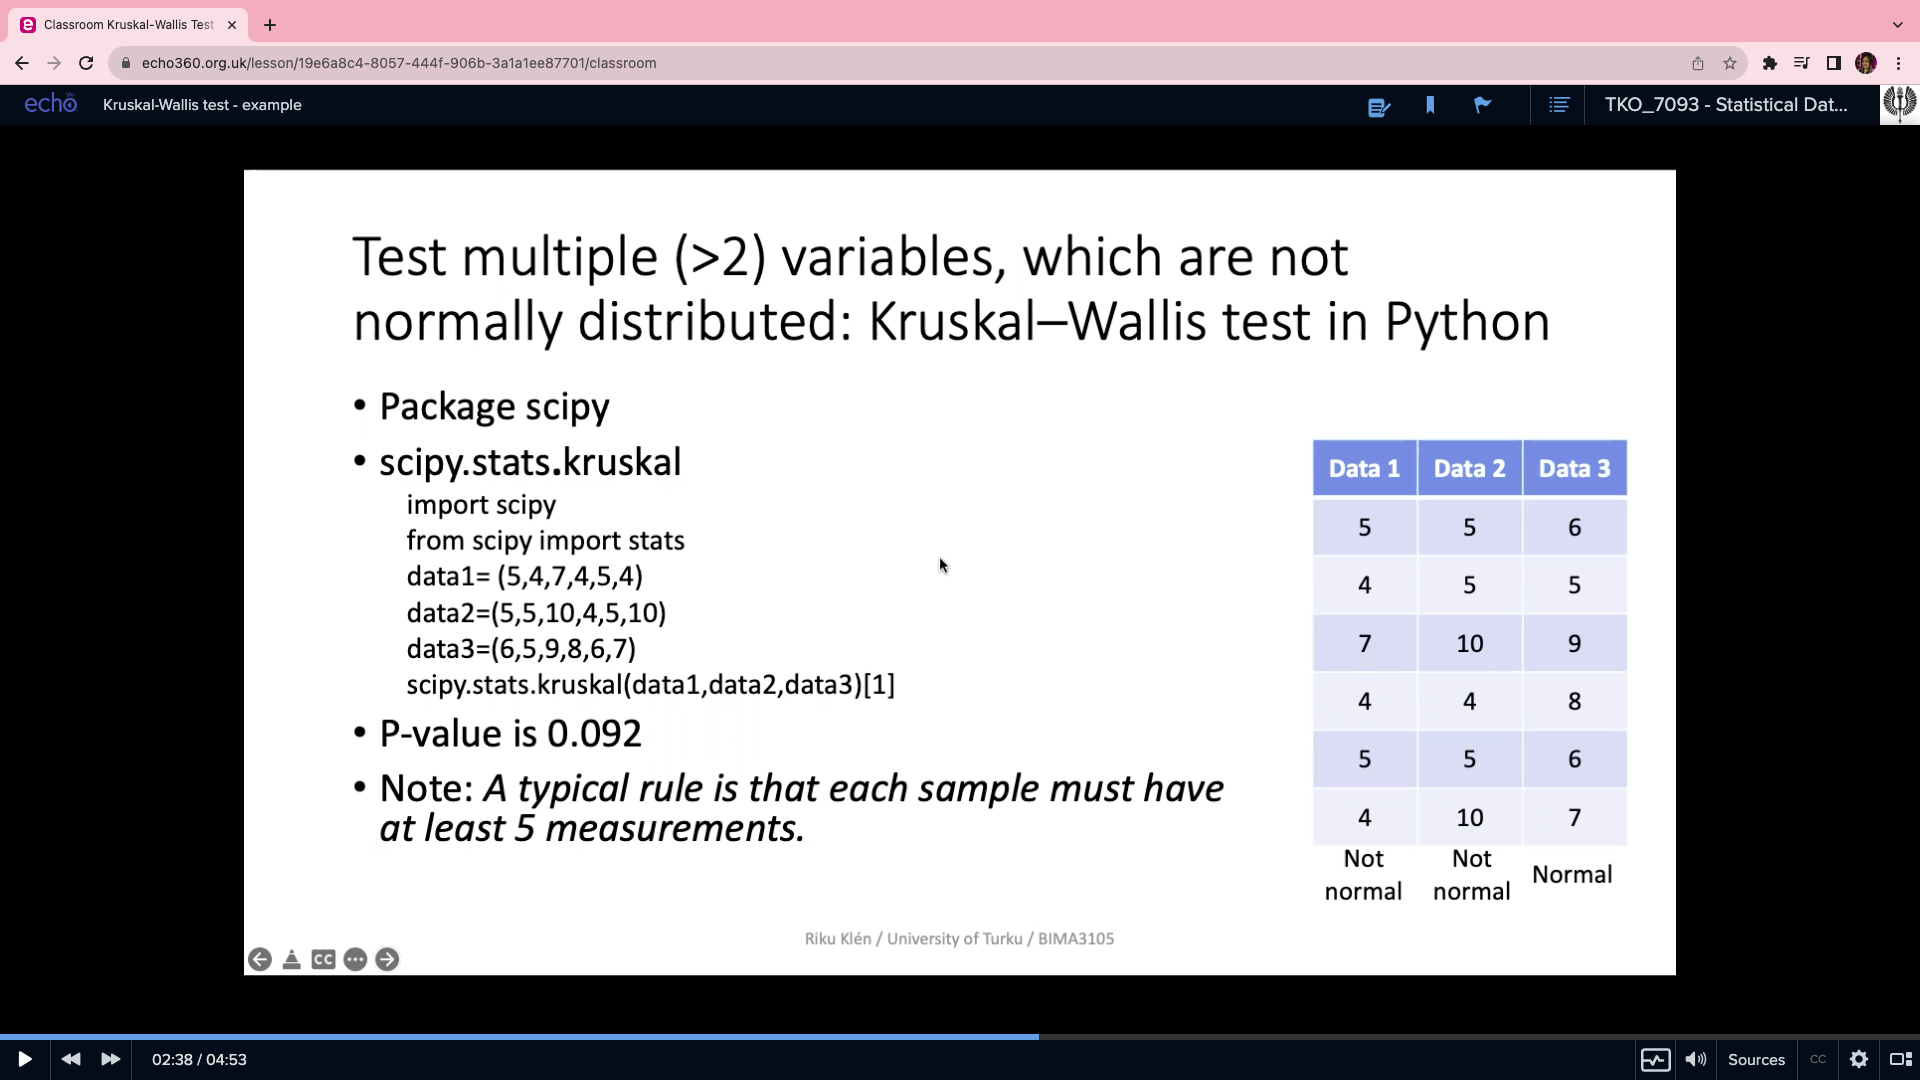



A typical rule is that each sample must have at least 5 measurements.

In [14]:
import scipy

In [15]:
from scipy import stats

In [16]:
data1 = (5,4,7,4,5,4)

In [17]:
data2 = (5,5,10,4,5,10)

In [18]:
data3 = (6,5,9,8,6,7)

In [19]:
scipy.stats.kruskal(data1,data2,data3)

KruskalResult(statistic=4.762214983713348, pvalue=0.09244813523688268)

P value = 0.0924

### **Testing multiple categorical variables (test multiple>2) categorical variables : Pearson"s Ch-I squared test in python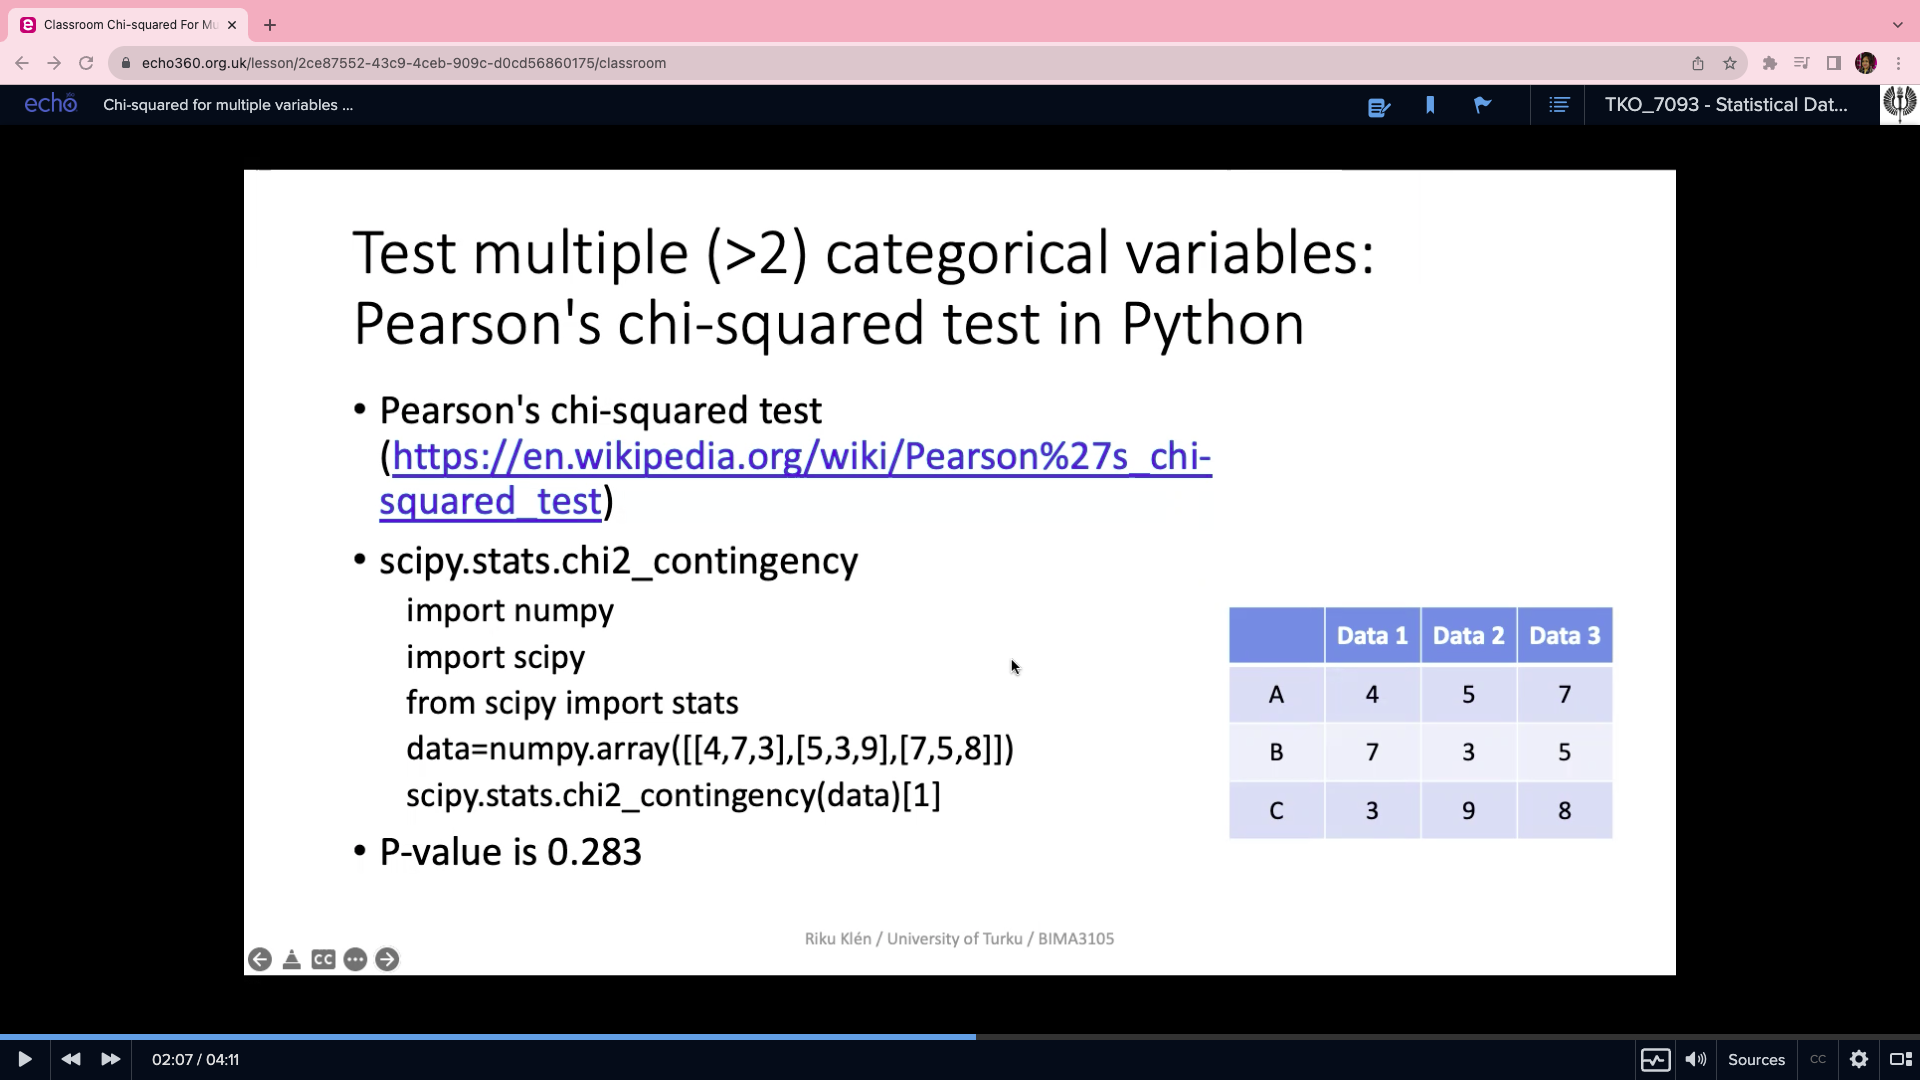**

In the above example, Data1,Data2,Data3 are divided into multiple categories, such as A,B and C.

In [20]:
import numpy

In [21]:
data = numpy.array([[4,7,3],[5,3,9],[7,5,8]])

In [22]:
data

array([[4, 7, 3],
       [5, 3, 9],
       [7, 5, 8]])

In [23]:
print(data)

[[4 7 3]
 [5 3 9]
 [7 5 8]]


In [24]:
scipy.stats.chi2_contingency(data) ###chi squared test

Chi2ContingencyResult(statistic=5.039017857142857, pvalue=0.2833173992687564, dof=4, expected_freq=array([[4.39215686, 4.11764706, 5.49019608],
       [5.33333333, 5.        , 6.66666667],
       [6.2745098 , 5.88235294, 7.84313725]]))

p value is pvalue = 0.283317...

### Pearson"s Chi-squared test

**Testing multiple categorical variables(>2)**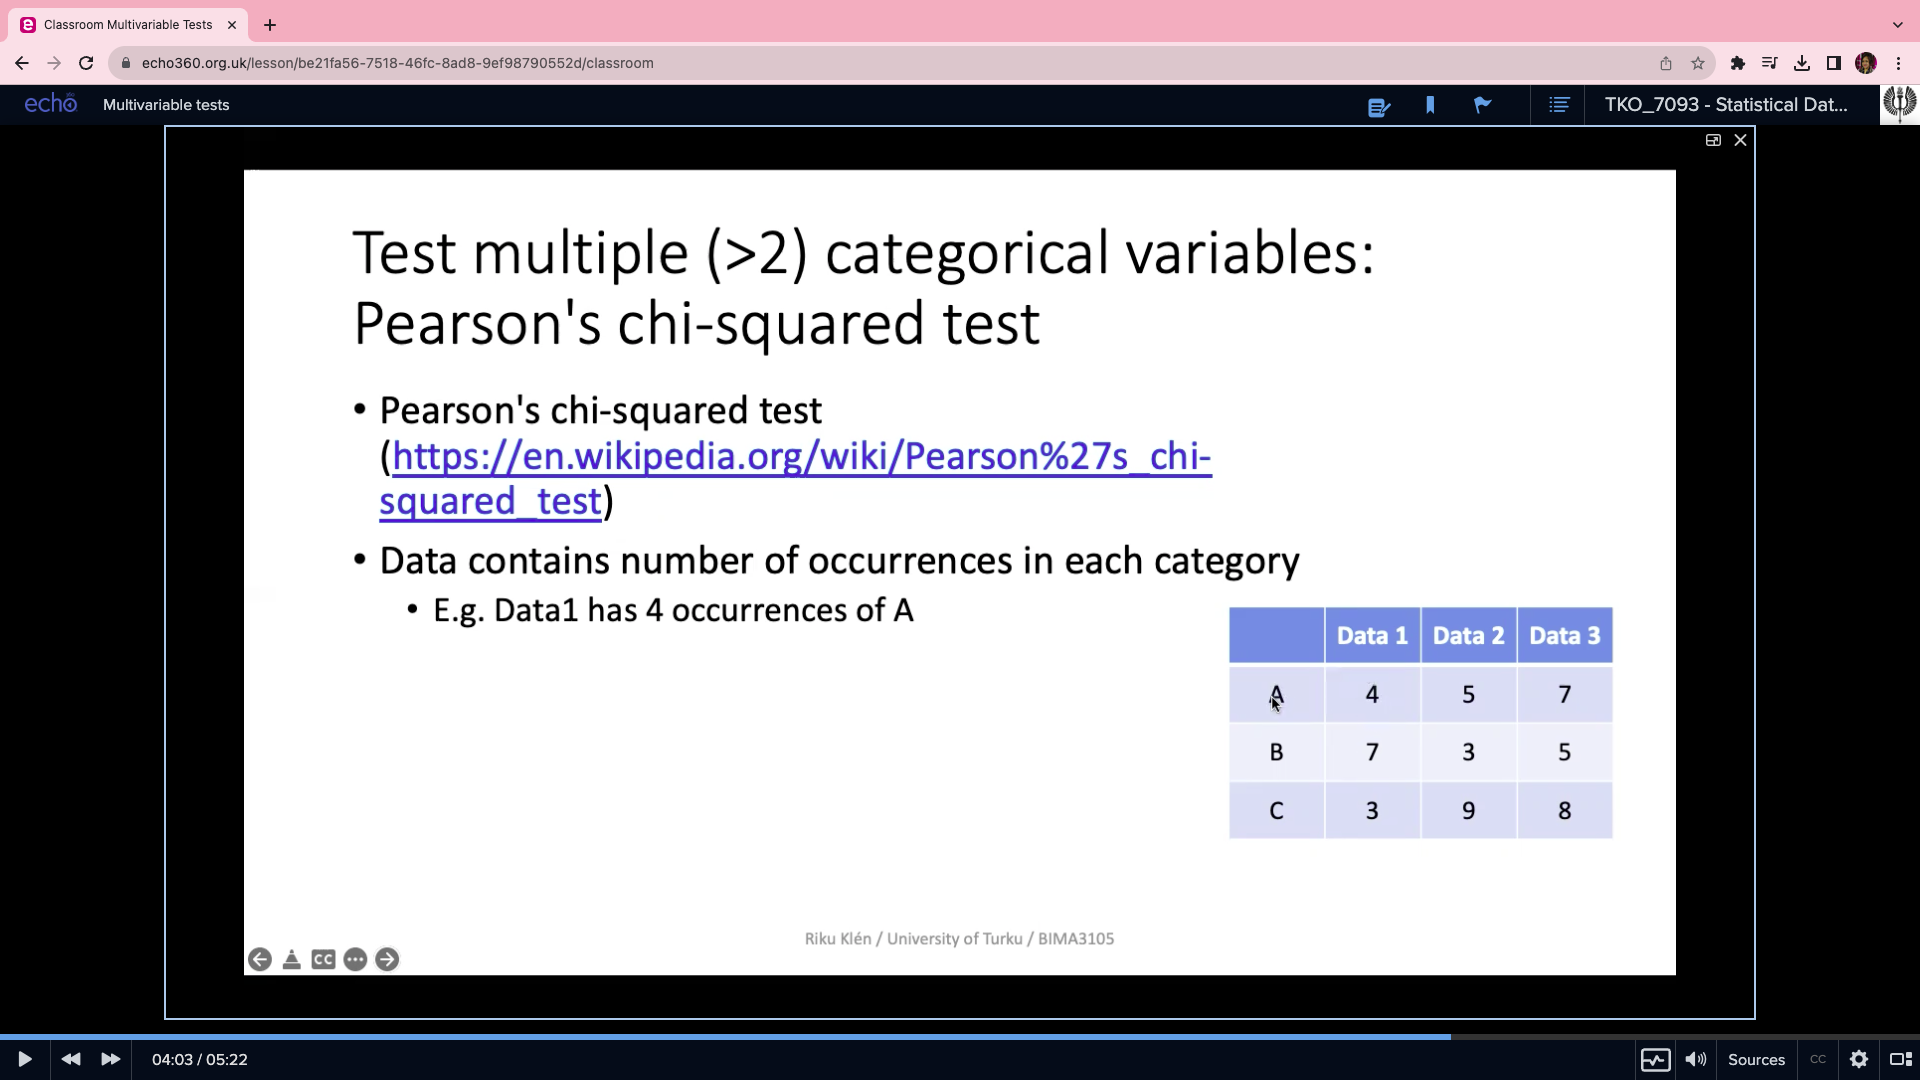